# Piquaf notebook

Copyright (c) 2023, Cibby Pulikkaseril
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

Piquaf is a open source Python tool to create <b>P</b>ublication <b>QUA</b>lity <b>F</b>igures.

Github link: https://github.com/acoustic-cib/piquaf


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.linspace(0, 100, 100)
y1 = 2*np.sin(x/5)
y2 = np.exp(-x/50) * np.cos(x/7)


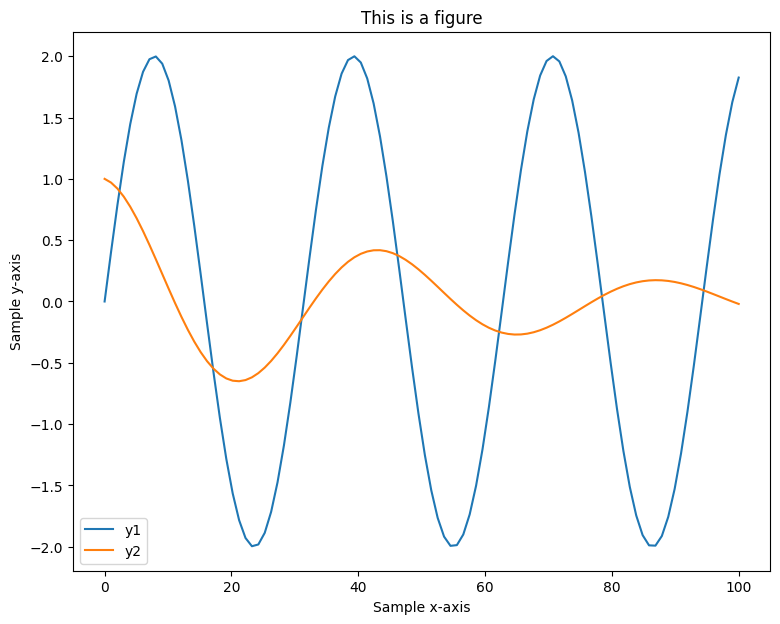

In [18]:
plt.figure(1, figsize=(9,7))
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')

plt.title('This is a figure')
plt.xlabel('Sample x-axis')
plt.ylabel('Sample y-axis')
plt.legend()
plt.show()